# Deep Learning and Neural Network - Question 1
## Arian Firoozi - 810100196
## Arman Majidi - 810100205

![University of Tehran logo](\UTLogo\University_of_Tehran_logo.svg "University of Tehran")
![Engineering faculty of University of Tehran logo](\UTLogo\Engineering_faculty_University_of_Tehran_logo.png "Engineering faculty")

# Outline
- [ 0 - Packages ](#0)
- [ 1 - Task 1 ](#1)
- [ 2 - Task 2 ](#2)
- [ 3 - Task 3 ](#3)
- [ 4 - Task 4 ](#4)
- [ 5 - Task 5 ](#5)

---

<a name="0"></a>
## 0 - Packages 

First, let's run the cell below to import all the packages.
- [numpy](https://numpy.org) is the fundamental package for working with matrices in Python.
- [scipy](https://scipy.org) is an open-source software for mathematics, science, and engineering.
- [matplotlib](http://matplotlib.org) is a famous library to plot graphs in Python.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2
from sklearn.metrics import confusion_matrix

---

<a name="1"></a>
## 1 - MLP Design

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
data_min = np.min(X_train, axis=0)
data_max = np.max(X_train, axis=0)
X_train = ((X_train - data_min) / (data_max - data_min)).astype(np.float64)
X_test = ((X_test - data_min) / (data_max - data_min)).astype(np.float64)

In [3]:
input_shape = X_train.shape[1:]
model = Sequential([
    Input(shape=input_shape),
    Flatten(),
    Dense(100, activation='relu', kernel_regularizer=l2(0.0001)),
    Dropout(0.3),
    Dense(10, activation='softmax')   
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [4]:
hist = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7483 - loss: 0.7398
Epoch 2/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8422 - loss: 0.4672
Epoch 3/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 993us/step - accuracy: 0.8528 - loss: 0.4352
Epoch 4/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8610 - loss: 0.4206
Epoch 5/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 999us/step - accuracy: 0.8601 - loss: 0.4231 
Epoch 6/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8652 - loss: 0.4052
Epoch 7/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 993us/step - accuracy: 0.8700 - loss: 0.4008
Epoch 8/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8736 - loss: 0.3904
Epoch 9/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8715 - loss: 0.3950
Epoch 10/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8718 - loss: 0.3971
Epoch 11/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8734 - loss: 0.3925
Epoch 12/100

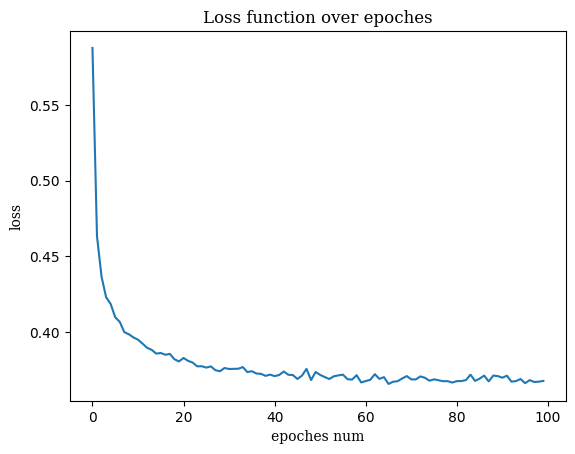

In [5]:
plt.plot(hist.history['loss'])
plt.title('Loss function over epoches', fontdict={'family':'serif'})
plt.xlabel('epoches num', fontdict={'family':'serif'})
plt.ylabel('loss', fontdict={'family':'serif'})
plt.show()

#### ◆ Confusion matrix

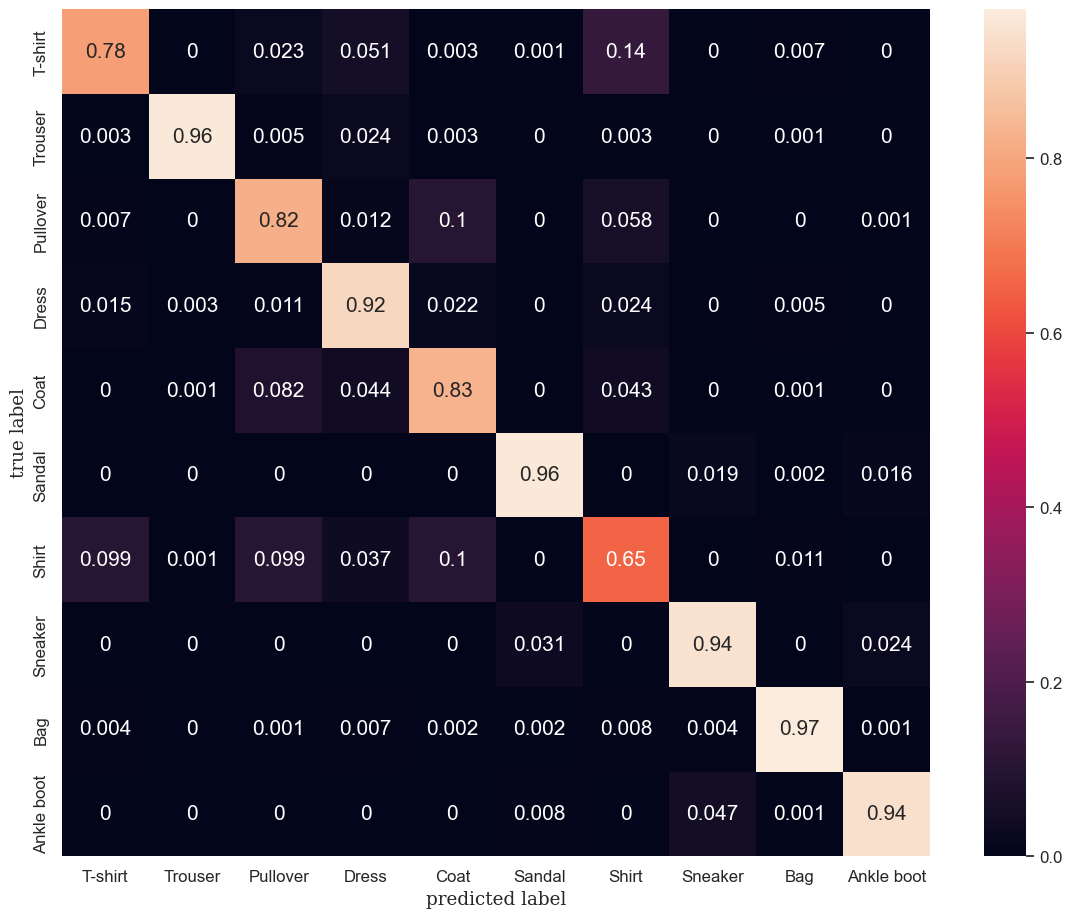

In [6]:
y_pred = model.predict(X_test, verbose=0)
y_pred_classes = np.argmax(y_pred, axis=1)
conf_mat = confusion_matrix(y_test, y_pred_classes)
conf_mat = conf_mat.T / np.sum(conf_mat, axis=1)

plt.figure(figsize=(14, 11))
sns.set(font_scale=1.1) # for label size
labels = ["T-shirt", "Trouser", "Pullover", "Dress",
          "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
sns.heatmap(conf_mat.T, xticklabels=labels, yticklabels=labels, annot=True, annot_kws={"size": 15})
plt.xlabel('predicted label', fontdict={'family':'serif'})
plt.ylabel('true label', fontdict={'family':'serif'})
plt.show()

#### ◆ Classes and most mistaken label

In [7]:
worst_class = np.argmax(conf_mat - np.diag(np.diag(conf_mat)), axis=0)
mapping = {0:"T-shirt", 1:"Trouser", 2:"Pullover", 3:"Dress", 4:"Coat",
           5:"Sandal", 6:"Shirt", 7:"Sneaker", 8:"Bag", 9:"Ankle boot"}
worst_labels = list(np.vectorize(mapping.get)(worst_class))
worst_labels

['Shirt',
 'Dress',
 'Coat',
 'Shirt',
 'Pullover',
 'Sneaker',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker']

#### ◆ Two most confused classes

In [8]:
two_worst_class = np.argmax(conf_mat + conf_mat.T - 2*np.diag(np.diag(conf_mat)))
two_worst_class = np.unravel_index(two_worst_class, conf_mat.shape)
two_worst_labels = list(np.vectorize(mapping.get)(two_worst_class))
two_worst_labels

['T-shirt', 'Shirt']

#### ◆ Increasing model complexity

Increasing the number of hidden layers or neurons allows the model to learn more complex representations and patterns from the data. However, it may also increase the risk of overfitting, especially if the model is too complex relative to the dataset size. The goal is to find a balance between model complexity and generalization.

#### ◆ Choosing best hyperparameters

One common method for selecting hyperparameters is Grid Search or Random Search. These approaches systematically evaluate different combinations of hyperparameters (like learning rate, regularization strength, number of neurons, etc.) and select the combination that provides the best validation accuracy. Additionally, more advanced techniques like Bayesian Optimization can also be used for more efficient hyperparameter tuning.

---

<a name="2"></a>
## 2 - Two Different Model Training

In [25]:
model1 = Sequential([
    Input(shape=input_shape),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')   
])
model1.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model2 = Sequential([
    Input(shape=input_shape),
    Flatten(),
    Dense(48, activation='relu', kernel_regularizer=l2(0.0001)),
    Dropout(0.2),
    Dense(10, activation='softmax')   
])
model2.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [26]:
hist1 = model1.fit(X_train, y_train, epochs=40, verbose=0)
hist2 = model2.fit(X_train, y_train, epochs=40, verbose=0)

In [27]:
model1_train = hist1.history['accuracy'][-1]
model1_test = model1.evaluate(X_test, y_test, verbose=0)
model2_train = hist2.history['accuracy'][-1]
model2_test = model2.evaluate(X_test, y_test, verbose=0)
print(f'Model 1 accuracy on train data: {model1_train}\n\taccuracy on test data:  {model1_test[1]}\n\n')
print(f'Model 2 accuracy on train data: {model2_train}\n\taccuracy on test data:  {model2_test[1]}')

Model 1 accuracy on train data: 0.9438999891281128
	accuracy on test data:  0.8773000240325928


Model 2 accuracy on train data: 0.871649980545044
	accuracy on test data:  0.8560000061988831


#### ◆ Histogram

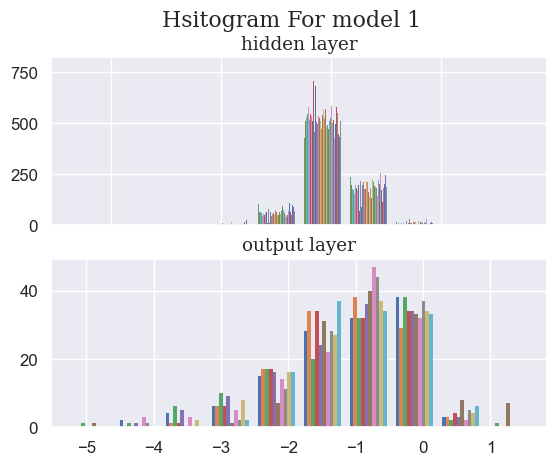

In [28]:
weights_hidden, bias_hidden, weights_last, bias_last = model1.weights
fig, axs = plt.subplots(2)
fig.suptitle('Hsitogram For model 1', fontdict={'family':'serif'})
axs[0].hist(np.array(weights_hidden.value), lw=0)
axs[0].set_title('hidden layer', fontdict={'family':'serif'})
axs[1].hist(np.array(weights_last.value), lw=0)
axs[1].set_title('output layer', fontdict={'family':'serif'})
for ax in axs.flat:
    ax.label_outer()
plt.show()

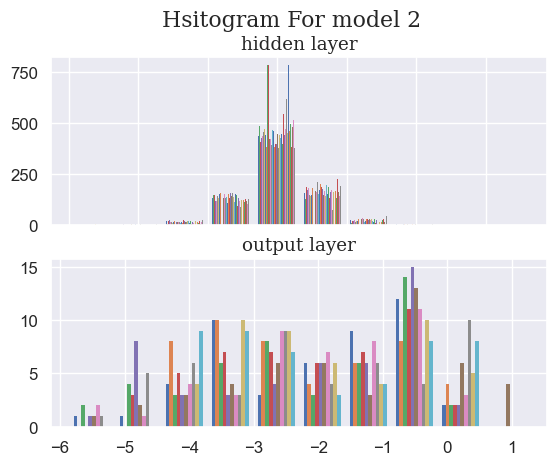

In [29]:
weights_hidden, bias_hidden, weights_last, bias_last = model2.weights
fig, axs = plt.subplots(2)
fig.suptitle('Hsitogram For model 2', fontdict={'family':'serif'})
axs[0].hist(np.array(weights_hidden.value), lw=0)
axs[0].set_title('hidden layer', fontdict={'family':'serif'})
axs[1].hist(np.array(weights_last.value), lw=0)
axs[1].set_title('output layer', fontdict={'family':'serif'})
for ax in axs.flat:
    ax.label_outer()
plt.show()

# Difference Should be written

#### ◆ Model improvement

##### Adam optimizer

In [30]:
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [31]:
hist1 = model1.fit(X_train, y_train, epochs=40, verbose=0)
hist2 = model2.fit(X_train, y_train, epochs=40, verbose=0)

In [32]:
model1_train = hist1.history['accuracy'][-1]
model1_test = model1.evaluate(X_test, y_test, verbose=0)
model2_train = hist2.history['accuracy'][-1]
model2_test = model2.evaluate(X_test, y_test, verbose=0)
print(f'Model 1 accuracy on train data: {model1_train}\n\taccuracy on test data:  {model1_test[1]}\n\n')
print(f'Model 2 accuracy on train data: {model2_train}\n\taccuracy on test data:  {model2_test[1]}')

Model 1 accuracy on train data: 0.9685999751091003
	accuracy on test data:  0.8866999745368958


Model 2 accuracy on train data: 0.8815333247184753
	accuracy on test data:  0.8705999851226807


##### RMSprop optimizer

In [33]:
model1.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model2.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [34]:
hist1 = model1.fit(X_train, y_train, epochs=40, verbose=0)
hist2 = model2.fit(X_train, y_train, epochs=40, verbose=0)

In [35]:
model1_train = hist1.history['accuracy'][-1]
model1_test = model1.evaluate(X_test, y_test, verbose=0)
model2_train = hist2.history['accuracy'][-1]
model2_test = model2.evaluate(X_test, y_test, verbose=0)
print(f'Model 1 accuracy on train data: {model1_train}\n\taccuracy on test data:  {model1_test[1]}\n\n')
print(f'Model 2 accuracy on train data: {model2_train}\n\taccuracy on test data:  {model2_test[1]}')

Model 1 accuracy on train data: 0.9811333417892456
	accuracy on test data:  0.8891000151634216


Model 2 accuracy on train data: 0.8700166940689087
	accuracy on test data:  0.8614000082015991


# Details Should be written

---

<a name="3"></a>
## 3 - Task 3

---

<a name="4"></a>
## 4 - Task 4

---

<a name="5"></a>
## 5 - Task 5

---